In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot
import gc
import multiprocessing as mp
from multiprocessing import Process, Queue
queue = Queue()
import matplotlib.pyplot as plt

In [2]:
redd_dfs={}

In [3]:
def read_df(file_title):
    try:
        df=pd.read_table(file_title, sep="," )
        df.columns = ["time","consumption"]
        try:
            df['time'] = pd.to_datetime(df['time'],unit='s')
        except:
            df['time'] = pd.to_datetime(df['time'])
        df.index= df.time
        df = df.sort_index()
        df.reset_index(drop=True, inplace=True)
        return (df)
    except:
        return(None)

In [4]:
for i in [1,2,3,5,6]:
    redd_dfs[i]=read_df("Redd_Cleaned/house_"+str(i)+".csv")

In [11]:
def redd_house(house_nb):
    return(redd_dfs[house_nb])

In [3]:
def resample_df(df,house_nb,sampling_rate):
    df.index=df.time
    df=df.resample(str(sampling_rate)+'S').ffill()
    df.time=df.index
    df.reset_index(drop=True, inplace=True)
    return (df,house_nb)

In [5]:
def plot_df(df,dataset,house_nb):
    return(df.plot(x="time",y=['consumption'], figsize=(15,4),title=dataset+"_house_"+str(house_nb)))

In [4]:
def resample_and_put_in_csv(df,house_nb,dataset,sampling_rate):
    df.index=df.time
    df=df.resample(str(sampling_rate)+'S').ffill()
    df.time=df.index
    df.reset_index(drop=True, inplace=True)
    df.to_csv(dataset+"_Resampled/house_"+str(house_nb)+".csv",index=False)

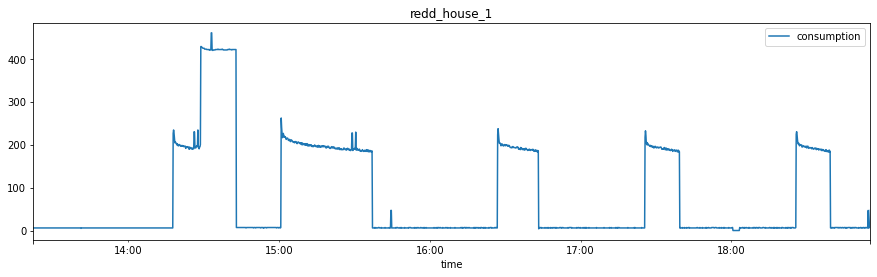

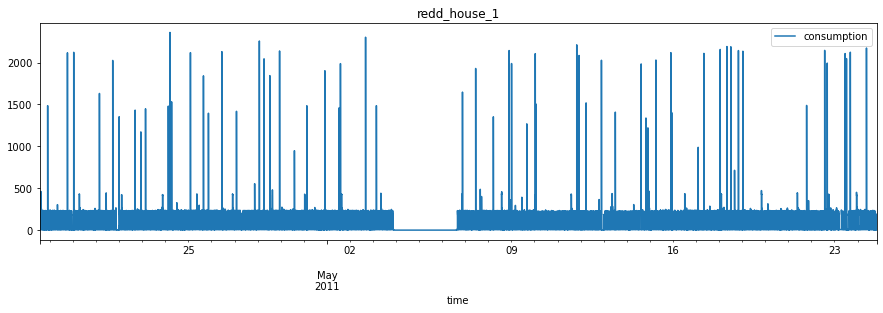

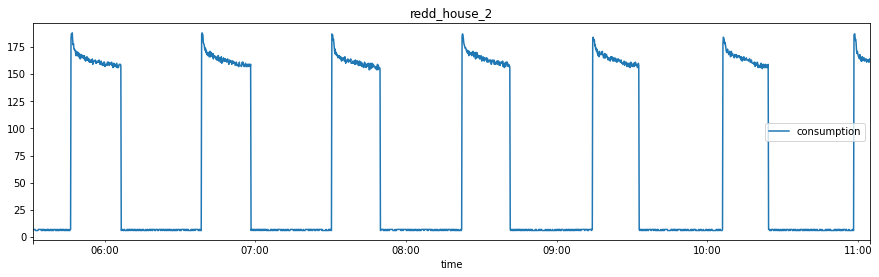

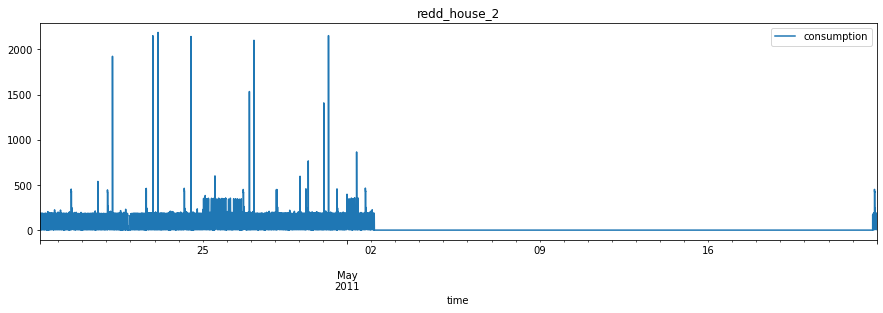

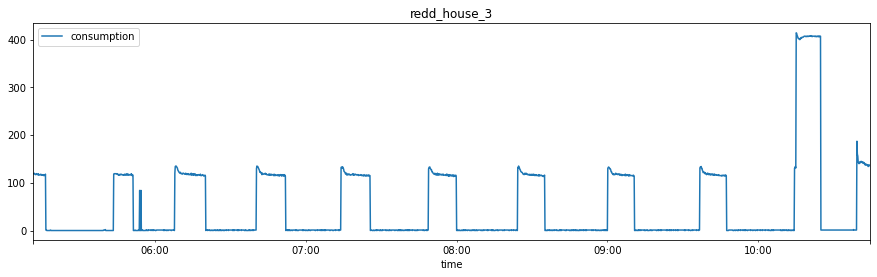

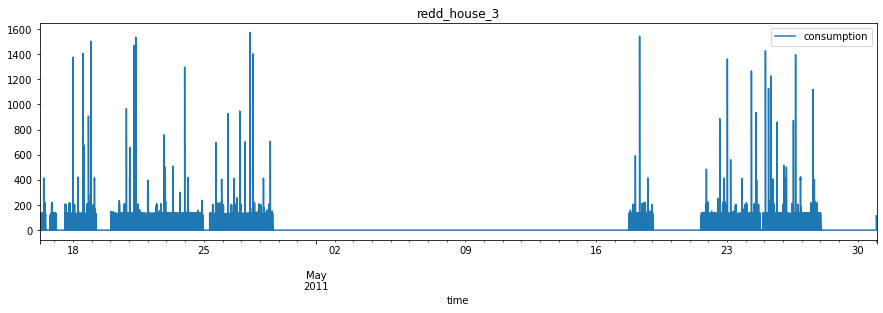

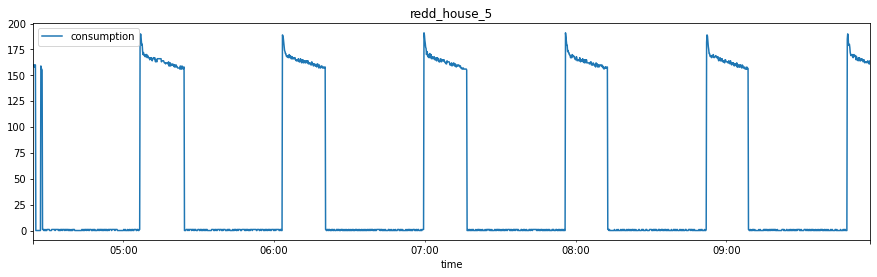

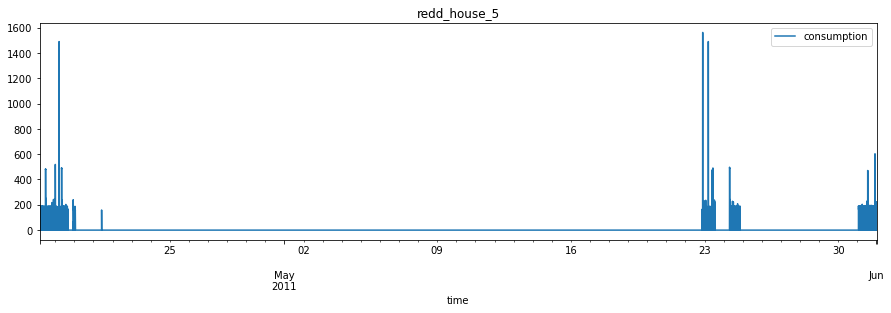

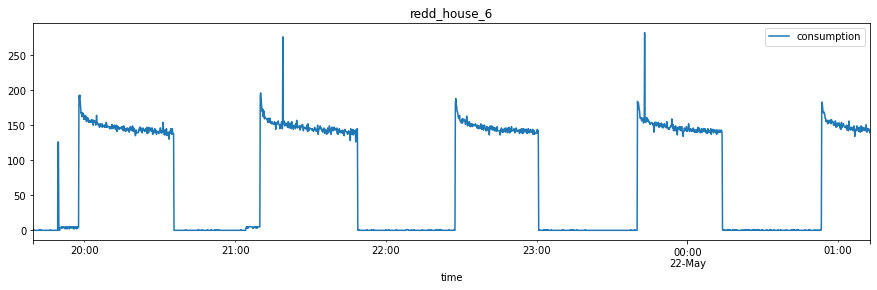

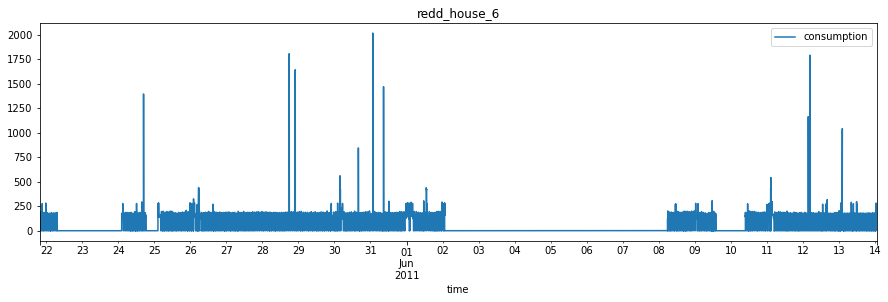

In [15]:
for i in [1,2,3,5,6]:
    df=redd_house(i)
    df=resample_df(df,10)
    plot_df(df.iloc[0:2000],"redd",i)
    plot_df(df,"redd",i)

In [10]:
pool = mp.Pool(processes = 3)
result=pool.starmap(resample_and_put_in_csv,((redd_house(i),i,"Redd",10) for i in [1,2,3,5,6]))

In [2]:
def read_df(file_title,house_nb):
    try:
        df=pd.read_table(file_title, sep="," )
        df.columns = ["time","consumption"]
        try:
            df['time'] = pd.to_datetime(df['time'],unit='s')
        except:
            df['time'] = pd.to_datetime(df['time'])
        df.index= df.time
        df = df.sort_index()
        df.reset_index(drop=True, inplace=True)
        return (df,house_nb)
    except:
        return(None)

In [4]:
pool = mp.Pool(processes = 3)
result=pool.starmap(read_df,(("Refit_Cleaned/fridge_freezer/house_"+str(i+1)+".csv",i+1) for i in range(21)))

In [5]:
refit_fridge_freezers={}
for i in range(len(result)):
    if result[i]!=None:
        refit_fridge_freezers[result[i][1]]=result[i][0]

In [6]:
refit_fridge_freezers.keys()

dict_keys([2, 3, 4, 5, 9, 10, 11, 12, 15, 16, 17, 18, 19, 21])

In [11]:
pool = mp.Pool(processes = 3)
result=pool.starmap(resample_df,((refit_fridge_freezers[house_nb],house_nb,10) for house_nb in refit_fridge_freezers.keys()))

In [12]:
resampled_refit_fridge_freezers={}
for i in range(len(result)):
    resampled_refit_fridge_freezers[result[i][1]]=result[i][0]

In [ ]:
pool = mp.Pool(processes = 3)
result=pool.starmap(plot_df,((resampled_refit_fridge_freezers[i],"Refit_fridge_freezers",i) for i in [4,5,9]))

<AxesSubplot:title={'center':'refit_fridge_freezer_house_2'}, xlabel='time'>

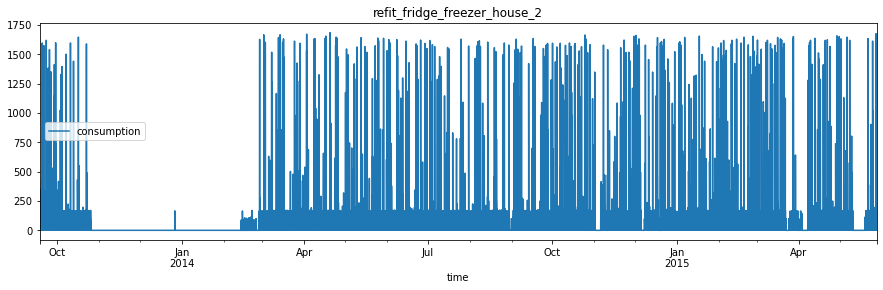

In [13]:
resampled_refit_fridge_freezers[2].plot(x="time",y=['consumption'], figsize=(15,4),title="refit_fridge_freezer_house_"+str(2))

<AxesSubplot:title={'center':'refit_fridge_freezer_house_3'}, xlabel='time'>

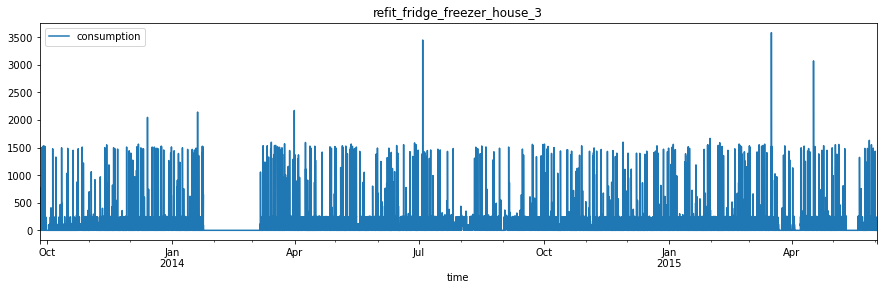

In [10]:
resampled_refit_fridge_freezers[3].plot(x="time",y=['consumption'], figsize=(15,4),title="refit_fridge_freezer_house_"+str(3))

In [14]:
def resample_and_put_in_csv(df,house_nb,dataset,sampling_rate):
    df.index=df.time
    df=df.resample(str(sampling_rate)+'S').ffill()
    df.time=df.index
    df.reset_index(drop=True, inplace=True)
    df.to_csv(dataset+"_Resampled/fridge_freezer/house_"+str(house_nb)+".csv",index=False)

In [15]:
pool = mp.Pool(processes = 3)
result=pool.starmap(resample_and_put_in_csv,((refit_fridge_freezers[i],i,"Refit",10) for i in refit_fridge_freezers.keys() ))

In [6]:
pool = mp.Pool(processes = 3)
result=pool.starmap(read_df,(("Refit_Cleaned/fridge/house_"+str(i+1)+".csv",i+1) for i in range(21)))

In [7]:
refit_fridges={}
for i in range(len(result)):
    if result[i]!=None:
        refit_fridges[result[i][1]]=result[i][0]

In [8]:
pool = mp.Pool(processes = 3)
result=pool.starmap(resample_df,((refit_fridges[house_nb],house_nb,10) for house_nb in refit_fridges.keys()))

In [9]:
resampled_refit_fridges={}
for i in range(len(result)):
    resampled_refit_fridges[result[i][1]]=result[i][0]

In [10]:
refit_fridges.keys()

dict_keys([1, 4, 7, 8, 11, 18, 20])

<AxesSubplot:title={'center':'refit_fridge_house_1'}, xlabel='time'>

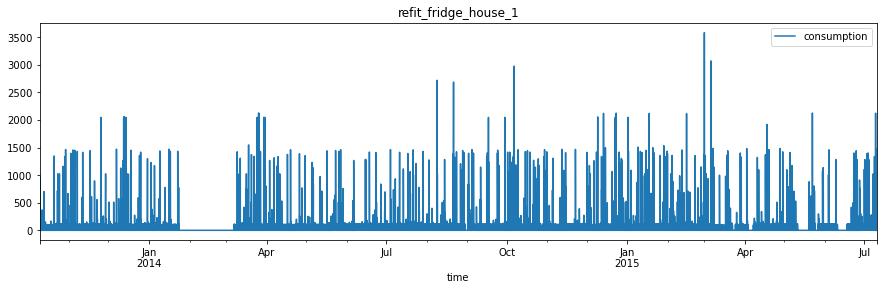

In [13]:
resampled_refit_fridges[1].plot(x="time",y=['consumption'], figsize=(15,4),title="refit_fridge_house_"+str(1))

<AxesSubplot:title={'center':'refit_fridge_house_4'}, xlabel='time'>

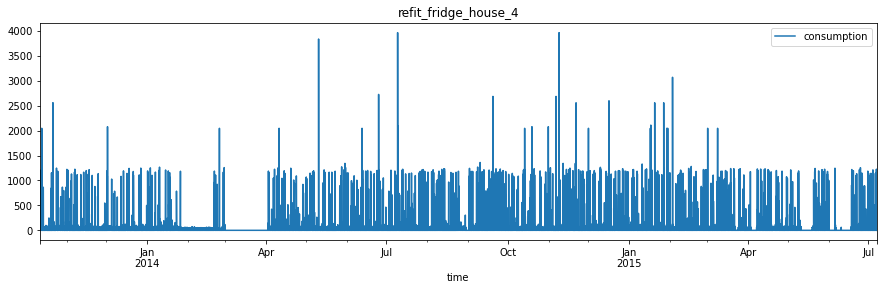

In [12]:
resampled_refit_fridges[4].plot(x="time",y=['consumption'], figsize=(15,4),title="refit_fridge_house_"+str(4))

In [11]:
def resample_and_put_in_csv(df,house_nb,dataset,sampling_rate):
    df.index=df.time
    df=df.resample(str(sampling_rate)+'S').ffill()
    df.time=df.index
    df.reset_index(drop=True, inplace=True)
    df.to_csv(dataset+"_Resampled/fridge/house_"+str(house_nb)+".csv",index=False)

In [12]:
pool = mp.Pool(processes = 3)
result=pool.starmap(resample_and_put_in_csv,((refit_fridges[i],i,"Refit",10) for i in refit_fridges.keys() ))